<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<b>Описание данных:<b><br>
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)<br>
* balcony — число балконов<br>
* ceiling_height — высота потолков (м)<br>
* cityCenters_nearest — расстояние до центра города (м)<br>
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)<br>
* first_day_exposition — дата публикации<br>
* floor — этаж<br>
* floors_total — всего этажей в доме<br>
* is_apartment — апартаменты (булев тип)<br>
* kitchen_area — площадь кухни в квадратных метрах (м²)<br>
* last_price — цена на момент снятия с публикации<br>
* living_area — жилая площадь в квадратных метрах (м²)<br>
* locality_name — название населённого пункта<br>
* open_plan — свободная планировка (булев тип)<br>
* parks_around3000 — число парков в радиусе 3 км<br>
* parks_nearest — расстояние до ближайшего парка (м)<br>
* ponds_around3000 — число водоёмов в радиусе 3 км<br>
* ponds_nearest — расстояние до ближайшего водоёма (м)<br>
* rooms — число комнат<br>
* studio — квартира-студия (булев тип)<br>
* total_area — площадь квартиры в квадратных метрах (м²)<br>
* total_images — число фотографий квартиры в объявлении<br>

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.sample()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11717,13,3950000.0,62.3,2018-11-11T00:00:00,3,2.5,9.0,39.7,7,NaN,...,10.1,2.0,Колпино,25454.0,31240.0,0.0,NaN,0.0,NaN,5.0


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


### Вывод

Не уверен, что они все столбцы датафрейма нужны для решения задачи.
Часть колонок описывает саму квартиру, часть - район.

Есть пропущенные данные - какие-то мы сможем заполнить, какие-то стоит оставить как есть.
Имеет смысл переименовать cityCenters_nearest в соответствии со стилем.

Исправим для начала все проблемы с данными.

## Предобработка данных

Количество фотографий квартиры, балконы, парки - это всё здорово, но для решения поставленной задачи они не понадобятся, так что первым делом отсечём излишние данные. 

In [4]:
data = data.drop(["total_images", "airports_nearest", "balcony", "open_plan", "parks_around3000", "parks_nearest", "ponds_around3000", "ponds_nearest"], axis = 1)

Посмотрим, что со столбцом is_apartment. Многовато пропусков. В рамках проекта принимаем решение, что пропуск = "не апартаменты". 
В реальных условиях запросил бы корректировку данных у источника.

In [5]:
data['is_apartment'] = data['is_apartment'].fillna(False)

У аппартаментов и студий ценообразование отличается от стандартных квартир, что повлияет на наши результаты.
Уберем из массива данных эти типы недвижимости.

In [6]:
data = data.loc[~data['is_apartment'] == True]
data = data.loc[~data['studio'] == True]
data = data.drop(['is_apartment', 'studio'], axis = 1)

Пройдёмся по оставишмся столбцам:<br>
last_price - присутствует подозрительно дешёвая (12190 рублей) квартира в Питере площадью в 109 квадратных метров. Сделаем отсечение по цене в 400000.<br>
total_area - 12 метров на комнату, туалет, ванну и кухню. Не верю. Отсечем площади < 29м. Считаю, что это на самом деле аппартаменты и студии.<br>
rooms - 0 комнат? Хочется, конечно, избавиться от подобных записей, но остальные столбцы выглядят правдоподобно. Оставим всё как есть, но будем аккуратны с анализом.<br>
ceiling_height - много пропусков. Здесь имеет смысл использовать медианное значение для заполнения.<br>
floors_total - всё хорошо, кроме 60-этажного здания в Кронштадте.<br>
living_area, floor, kitchen_area, locality_name, cityCenters_nearest, days_exposition - аномалии не обнаружены.<br>

In [7]:
data = data.loc[data['last_price'] > 400000]
data = data.loc[data['total_area'] > 29]
data = data.loc[data['floors_total'] < 50]

Переименуем столбец с расстоянием до центра города.

In [8]:
data.rename(columns={'cityCenters_nearest': 'center_distance'}, inplace=True)

Посмотрим, что у нас с дубликатами.

In [9]:
data.drop_duplicates().reset_index(drop = True)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,center_distance,days_exposition
0,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,25.00,Санкт-Петербург,16028.0,NaN
1,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,11.00,посёлок Шушары,18603.0,81.0
2,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,8.30,Санкт-Петербург,13933.0,558.0
3,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,Санкт-Петербург,6800.0,424.0
4,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,41.00,Санкт-Петербург,8098.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...
22941,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,13.83,Санкт-Петербург,4232.0,NaN
22942,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,8.50,Тосно,NaN,45.0
22943,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,село Рождествено,NaN,NaN
22944,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,23.30,Санкт-Петербург,10364.0,602.0


Исправим типы данных. Цена, этажи, расстояние до центра и количество дней на продаже должны быть целочисленными.<br>
days_exposition перевести в Int64 получилось только после конвертации в float32. Посему отдельной строкой. Чёрная магия.

In [10]:
data = data.astype({"last_price": "Int64", 'floors_total': 'Int64', 'center_distance': 'Int64'}, errors = 'ignore')
data['days_exposition'] = data['days_exposition'].astype('float32').astype('Int64')

Заполняем высоту комнаты медианным значением.

In [11]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

Изменяем формат даты на читабельный.

In [12]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [13]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # исходим из предположения о том, что если это не DataFrame, то это Series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # преобразуем байты в мегабайты
    return "{:03.2f} MB".format(usage_mb)

mem_usage(data)

'4.60 MB'

In [14]:
data['total_area'] = data['total_area'].astype('float16')
data['rooms'] = data['rooms'].astype('uint8')
data['floors_total'] = data['floors_total'].astype('uint8')
data['living_area'] = data['living_area'].astype('float16')
data['floor'] = data['floor'].astype('uint8')
data['kitchen_area'] = data['kitchen_area'].astype('float16')
data['ceiling_height'] = data['ceiling_height'].astype('float16')
data['center_distance'] = data['center_distance'].astype('Int32')
data['days_exposition'] = data['days_exposition'].astype('Int16')
mem_usage(data)

'3.38 MB'

## Расчёты и добавление результатов в таблицу

В соответствии с первым пунктом задачи рассчитаем цену квадратного метра.

In [15]:
data['meter_price'] = data['last_price'] // data['total_area']
data['meter_price'] = data['meter_price'].astype('Int32')

Добавим день, неделю и месяц публикации объявления в отдельные столбцы.

In [16]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

Проведем категоризацию этажа квартиры; варианты — первый, последний, другой.

In [17]:
def check_category(row):
    floor = row['floor']
    last_floor = row['floors_total']
    if floor == 1:
        return 'Первый'
    elif floor == last_floor:
        return 'Последний'
    return 'Другой'
data['floor_category'] = data.apply(check_category, axis = 1)

Посчитаем соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [18]:
data['living_to_overall'] = data['living_area'] / data['total_area']
data['kitchen_to_overall'] = data['kitchen_area'] / data['total_area']

Итоговый результат перед следующим этапом:

In [19]:
data.info()
data.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22946 entries, 0 to 23698
Data columns (total 19 columns):
last_price              22946 non-null Int64
total_area              22946 non-null float16
first_day_exposition    22946 non-null datetime64[ns]
rooms                   22946 non-null uint8
ceiling_height          22946 non-null float16
floors_total            22946 non-null uint8
living_area             21153 non-null float16
floor                   22946 non-null uint8
kitchen_area            21110 non-null float16
locality_name           22898 non-null object
center_distance         17687 non-null Int32
days_exposition         19847 non-null Int16
meter_price             22946 non-null Int32
weekday                 22946 non-null int64
month                   22946 non-null int64
year                    22946 non-null int64
floor_category          22946 non-null object
living_to_overall       21153 non-null float16
kitchen_to_overall      21110 non-null float16
dtypes: Int16

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,center_distance,days_exposition,meter_price,weekday,month,year,floor_category,living_to_overall,kitchen_to_overall
0,13000000,108.00000,2019-03-07,3,2.699219,16,51.000000,8,25.000000,Санкт-Петербург,16028,NaN,120370,3,3,2019,Другой,0.472168,0.231445
1,3350000,40.40625,2018-12-04,1,2.650391,11,18.593750,1,11.000000,посёлок Шушары,18603,81,82907,1,12,2018,Первый,0.460205,0.272217
2,5196000,56.00000,2015-08-20,2,2.650391,5,34.312500,4,8.296875,Санкт-Петербург,13933,558,92785,3,8,2015,Другой,0.612793,0.148193
3,64900000,159.00000,2015-07-24,3,2.650391,14,NaN,9,NaN,Санкт-Петербург,6800,424,408176,4,7,2015,Другой,NaN,NaN
4,10000000,100.00000,2018-06-19,2,3.029297,14,32.000000,13,41.000000,Санкт-Петербург,8098,121,100000,1,6,2018,Другой,0.320068,0.409912
5,2890000,30.40625,2018-09-10,1,2.650391,12,14.398438,5,9.101562,городской посёлок Янино-1,NaN,55,95046,0,9,2018,Другой,0.473633,0.299316
6,3700000,37.31250,2017-11-02,1,2.650391,26,10.601562,6,14.398438,посёлок Парголово,19143,155,99162,3,11,2017,Другой,0.284180,0.385986
7,7915000,71.62500,2019-04-18,2,2.650391,24,NaN,22,18.906250,Санкт-Петербург,11634,NaN,110506,3,4,2019,Другой,NaN,0.263916
8,2900000,33.15625,2018-05-23,1,2.650391,27,15.429688,26,8.812500,посёлок Мурино,NaN,189,87464,2,5,2018,Другой,0.465332,0.265869
9,5400000,61.00000,2017-02-26,3,2.500000,9,43.593750,7,6.500000,Санкт-Петербург,15008,289,88524,6,2,2017,Другой,0.714844,0.106567


## Исследовательский анализ данных

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограмму для каждого параметра.

Площадь:

In [20]:
data['total_area'].describe()

count    22946.00000
mean             inf
std              inf
min         29.09375
25%         41.00000
50%         53.00000
75%         70.00000
max        900.00000
Name: total_area, dtype: float64

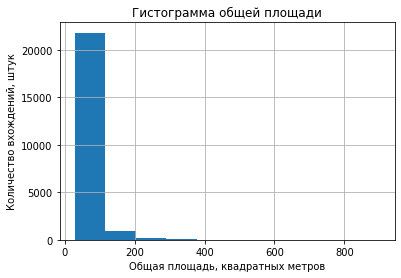

In [21]:
data['total_area'].hist()
plt.xlabel('Общая площадь, квадратных метров')
plt.ylabel('Количество вхождений, штук')
plt.title('Гистограмма общей площади')
plt.show()

Ага, большинство квартир площадью от 30 до 200 метров.<br>
Построим две отдельные гистограммы для квартир меньше и больше 200 метров, также посмотрим на гигантские квартиры, всё ли там в порядке.<br> Отмечу сразу, что ничего в глаза не бросилось.

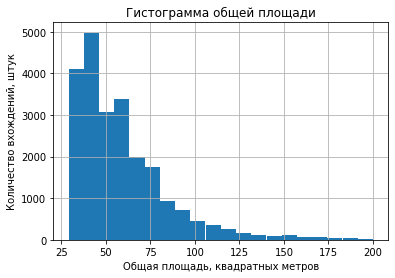

In [22]:
data['total_area'].hist(bins = 20, range=(29, 200))
plt.xlabel('Общая площадь, квадратных метров')
plt.ylabel('Количество вхождений, штук')
plt.title('Гистограмма общей площади')
plt.show()

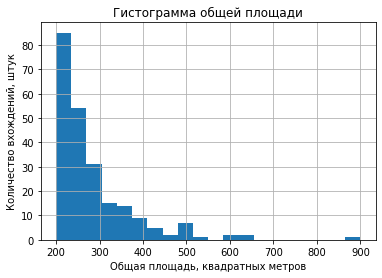

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,center_distance,days_exposition,meter_price,weekday,month,year,floor_category,living_to_overall,kitchen_to_overall
2462,7900000,201.50,2018-08-17,7,2.650391,2,NaN,2,NaN,посёлок Парголово,20665,35,39205,4,8,2018,Последний,NaN,NaN
7399,11000000,230.00,2018-03-01,5,2.500000,2,NaN,2,NaN,деревня Хязельки,NaN,419,47826,3,3,2018,Последний,NaN,NaN
22038,11940000,206.00,2018-12-12,5,3.500000,6,160.000,3,26.000000,Санкт-Петербург,1852,90,57961,2,12,2018,Другой,0.776855,0.126221
2489,12500000,255.00,2017-04-21,3,2.650391,2,153.875,2,100.687500,Санкт-Петербург,6916,102,49019,4,4,2017,Последний,0.603516,0.394775
6107,13200000,236.00,2018-07-20,4,2.800781,3,78.000,3,19.000000,Сертолово,NaN,42,55932,4,7,2018,Последний,0.330566,0.080505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16461,245000000,285.75,2017-04-10,6,3.349609,7,182.750,4,29.796875,Санкт-Петербург,6235,249,857392,0,4,2017,Другой,0.639648,0.104248
15651,300000000,618.00,2017-12-18,7,3.400391,7,258.000,5,70.000000,Санкт-Петербург,5297,111,485436,0,12,2017,Другой,0.417480,0.113281
14706,401300000,401.00,2016-02-20,5,2.650391,9,204.000,9,24.000000,Санкт-Петербург,2389,393,1000748,5,2,2016,Последний,0.508789,0.059845
19540,420000000,900.00,2017-12-06,12,2.800781,25,409.750,25,112.000000,Санкт-Петербург,7877,106,466666,2,12,2017,Последний,0.455322,0.124451


In [23]:
data['total_area'].hist(bins = 20, range=(200, 900))
plt.xlabel('Общая площадь, квадратных метров')
plt.ylabel('Количество вхождений, штук')
plt.title('Гистограмма общей площади')
plt.show()
data[data['total_area'] > 200].sort_values(by='last_price', ascending=True)

Теперь посмотрим на цену. Ожидаю увидеть схожую картину с площадью. Данные разделю на миллион, чтобы уйти от экспоненты.

In [24]:
data["last_price_millions"] = data['last_price'] / 1000000
data['last_price_millions'] = data['last_price_millions'].astype('uint8')
data['last_price_millions'].describe()

count    22946.000000
mean         6.061492
std          8.696130
min          0.000000
25%          3.000000
50%          4.000000
75%          6.000000
max        251.000000
Name: last_price_millions, dtype: float64

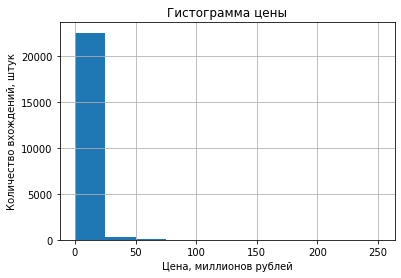

In [25]:
data['last_price_millions'].hist()
plt.xlabel('Цена, миллионов рублей')
plt.ylabel('Количество вхождений, штук')
plt.title('Гистограмма цены')
plt.show()

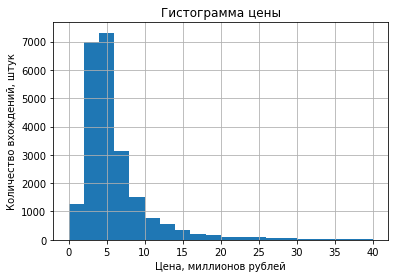

In [26]:
data['last_price_millions'].hist(bins = 20, range=(0, 40))
plt.xlabel('Цена, миллионов рублей')
plt.ylabel('Количество вхождений, штук')
plt.title('Гистограмма цены')
plt.show()

По этим двум параметрам видно, что гигантские квартиры стоят огромных денег. Ставим квартиры площадью > 200 метров и ценой > 40 миллионов как кандидаты на отсечение.

Посмотрим информацию по числу комнат. Вспомним, что у нас есть квартиры с 0 комнатами.

In [27]:
data['rooms'].describe()

count    22946.000000
mean         2.107557
std          1.066181
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

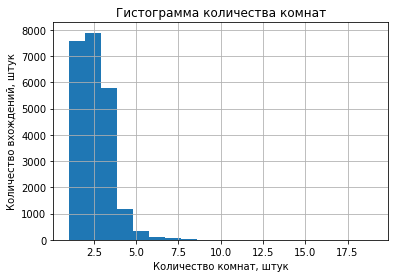

In [28]:
data['rooms'].hist(range=(1,19), bins = 19)
plt.xlabel('Количество комнат, штук')
plt.ylabel('Количество вхождений, штук')
plt.title('Гистограмма количества комнат')
plt.show()

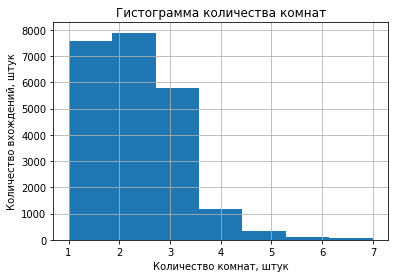

In [29]:
data['rooms'].hist(range=(1,7), bins = 7)
plt.xlabel('Количество комнат, штук')
plt.ylabel('Количество вхождений, штук')
plt.title('Гистограмма количества комнат')
plt.show()

Похоже, имеет смысл отсечь квартиры с 8+ комнат.

Высота потолка:

In [30]:
data['ceiling_height'].describe()

count    22946.000000
mean         2.718750
std          0.723633
min          1.000000
25%          2.599609
50%          2.650391
75%          2.699219
max         32.000000
Name: ceiling_height, dtype: float64

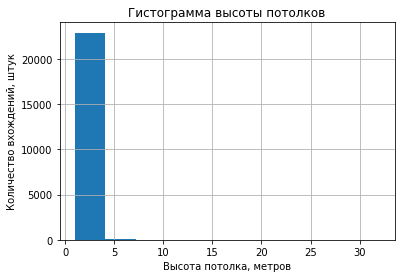

In [31]:
data['ceiling_height'].hist()
plt.xlabel('Высота потолка, метров')
plt.ylabel('Количество вхождений, штук')
plt.title('Гистограмма высоты потолков')
plt.show()

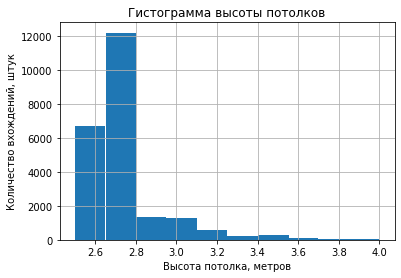

In [32]:
data['ceiling_height'].hist(bins = 10, range= (2.5,4))
plt.xlabel('Высота потолка, метров')
plt.ylabel('Количество вхождений, штук')
plt.title('Гистограмма высоты потолков')
plt.show()

Гугл говорит, что минимальная высота потолка должна быть 2.5м. Гуглу мы верим.<br>
Также нам мало интересны потолки > 4м.

Изучим время продажи квартиры.

In [33]:
data['days_exposition'].describe()

count    19847.000000
mean       182.220084
std        220.351605
min          1.000000
25%         45.000000
50%         97.000000
75%        233.000000
max       1580.000000
Name: days_exposition, dtype: float64

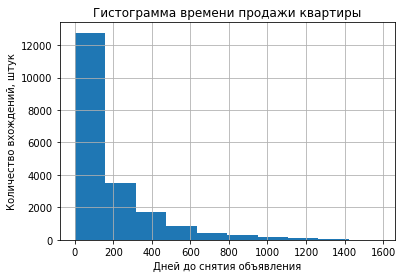

In [34]:
data['days_exposition'].hist()
plt.xlabel('Дней до снятия объявления')
plt.ylabel('Количество вхождений, штук')
plt.title('Гистограмма времени продажи квартиры')
plt.show()

Необязательно считать среднее и медиану - всё же есть в describe.<br>
Среднее - 182 дня, медиана - 97 дней.<br>
Очень быстро и очень долго здесь понятия растяжимые. На мой взгляд: меньше месяца - это быстро, больше года - долго.<br>
За "обычно" я бы принял значение между месяцем и полугодом.

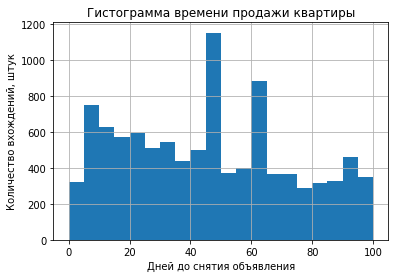

In [35]:
data['days_exposition'].hist(bins = 20, range = (0, 100))
plt.xlabel('Дней до снятия объявления')
plt.ylabel('Количество вхождений, штук')
plt.title('Гистограмма времени продажи квартиры')
plt.show()

Уберём редкие и выбивающиеся значения исходя из наблюдений, полученных при анализе.

In [36]:
data = data.query('(total_area < 201) & (last_price < 40000000) & (0 < rooms <= 7) & (2.5 < ceiling_height < 4)')

Изучаем зависимость цены от площади.

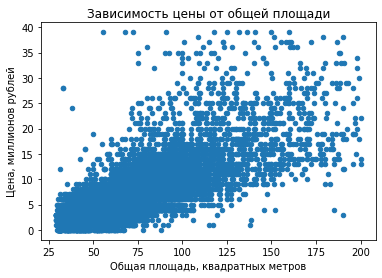

In [37]:
data.plot(x='total_area', y='last_price_millions', kind='scatter')
plt.xlabel('Общая площадь, квадратных метров')
plt.ylabel('Цена, миллионов рублей')
plt.title('Зависимость цены от общей площади')
plt.show()

In [38]:
data['total_area'].corr(data['last_price_millions'])

0.7715483342430675

Изучаем зависимость цены от количества комнат.

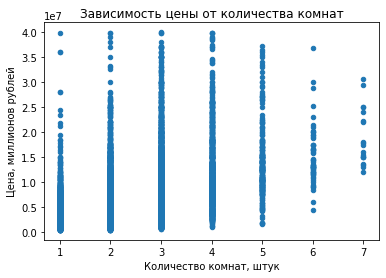

In [39]:
data.plot(x='rooms', y='last_price', kind='scatter')
plt.xlabel('Количество комнат, штук')
plt.ylabel('Цена, миллионов рублей')
plt.title('Зависимость цены от количества комнат')
plt.show()

In [40]:
data['rooms'].astype('float64').corr(data['last_price_millions']) #без astype выдает ошибку

0.4913807696004535

Изучаем зависимость цены от удалённости от центра.

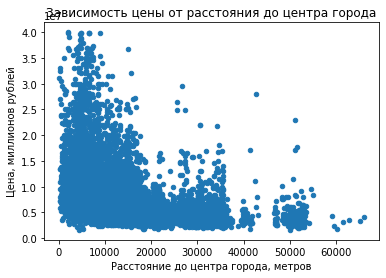

In [41]:
data.plot(x='center_distance', y='last_price', kind='scatter')
plt.xlabel('Расстояние до центра города, метров')
plt.ylabel('Цена, миллионов рублей')
plt.title('Зависимость цены от расстояния до центра города')
plt.show()

In [42]:
data['center_distance_km'] = data['center_distance'] / 1000
data['center_distance_km'].corr(data['last_price_millions'])

-0.34582789057477265

Изучаем зависимость цены от этажа.

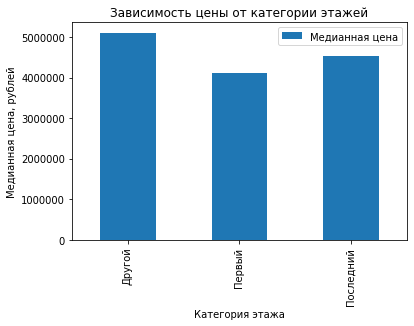

In [43]:
categories = data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = 'median')
categories.plot(y='last_price', kind='bar', label='Медианная цена')
plt.xlabel('Категория этажа')
plt.ylabel('Медианная цена, рублей')
plt.title('Зависимость цены от категории этажей')
plt.show()

От дня, месяца и года.

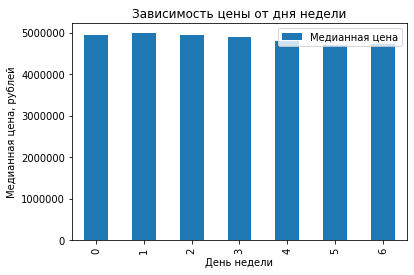

In [44]:
day = data.pivot_table(index = 'weekday', values = 'last_price', aggfunc = 'median')
day.plot(y='last_price', kind='bar', label = 'Медианная цена')
plt.xlabel('День недели')
plt.ylabel('Медианная цена, рублей')
plt.title('Зависимость цены от дня недели')
plt.show()

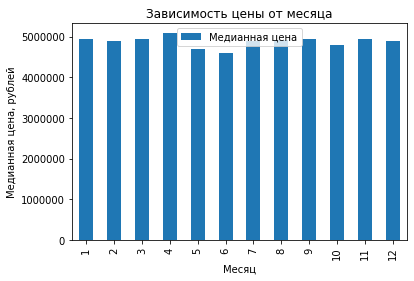

In [45]:
month = data.pivot_table(index = 'month', values = 'last_price', aggfunc = 'median')
month.plot(y='last_price', kind='bar', label='Медианная цена')
plt.xlabel('Месяц')
plt.ylabel('Медианная цена, рублей')
plt.title('Зависимость цены от месяца')
plt.show()

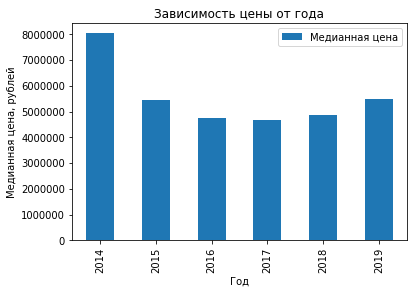

In [46]:
year = data.pivot_table(index = 'year', values = 'last_price', aggfunc = 'median')
year.plot(y='last_price', kind='bar', label = 'Медианная цена')
plt.xlabel('Год')
plt.ylabel('Медианная цена, рублей')
plt.title('Зависимость цены от года')
plt.show()

Определим 10 населённых пунктов с наибольшим числом объявлений и заодно посчитаем среднюю цену квадратного метра в этих населённых пунктах.

In [47]:
city = data.pivot_table(index = 'locality_name', values = 'meter_price', aggfunc = ['median', 'count'])
city.columns = ['median_price', 'count']
city.sort_values(by='count', ascending = False).head(10)

,median_price,count
locality_name,,
Санкт-Петербург,105523.0,12810
посёлок Мурино,83082.5,448
посёлок Шушары,76125.0,397
Всеволожск,65862.5,354
посёлок Парголово,92051.0,305
Пушкин,100000.0,280
деревня Кудрово,91095.0,264
Гатчина,68547.0,233
Колпино,74689.5,230


Выделим населённые пункты с самой высокой и низкой стоимостью жилья и условием количество объявлений - 20 и больше. Иначе населённые пункты с одним объявлением могут испортить статистику.

In [48]:
city20 = city.query('count > 19')
city20[city20['median_price'] == city20['median_price'].max()]

,median_price,count
locality_name,,
Санкт-Петербург,105523.0,12810


In [49]:
city20[city20['median_price'] == city20['median_price'].min()]

,median_price,count
locality_name,,
Сланцы,17635.0,80


Определим какая область входит в центр Питера. Для начала округлим center_distance_km до целых значений. Здесь у меня astype наотрез отказался работать, воспользовался round.

In [50]:
data['center_distance_km'] = data['center_distance_km'].round()
spb_center = data[data['locality_name'] == "Санкт-Петербург"]

Посчитаем среднюю цену для каждого километра.

In [51]:
spb_area = spb_center.pivot_table(index = 'center_distance_km', values = 'last_price_millions', aggfunc = 'median')

И построим график.

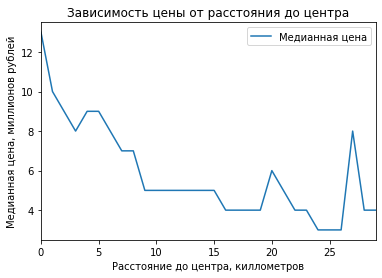

In [52]:
spb_area.plot(y = 'last_price_millions', label='Медианная цена')
plt.xlabel('Расстояние до центра, киллометров')
plt.ylabel('Медианная цена, миллионов рублей')
plt.title('Зависимость цены от расстояния до центра')
plt.show()

Интересно. <br>
В случае с 27 километрами только два кейса, оттого медиана аномально отклонена.<br>
Две сильные просадки цены - 3 км и 9 км.

Теперь проведем анализ квартир в центре по площади:

In [53]:
spb_good = spb_center.query('center_distance_km < 9')
spb_good['total_area'].describe()

count    3550.00000
mean            inf
std        34.46875
min        29.40625
25%        55.71875
50%        75.00000
75%       100.00000
max       200.00000
Name: total_area, dtype: float64

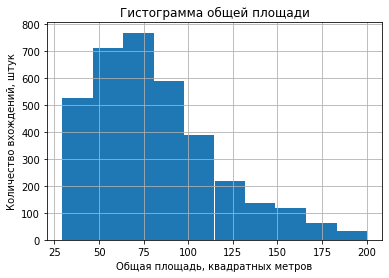

In [54]:
spb_good['total_area'].hist()
plt.xlabel('Общая площадь, квадратных метров')
plt.ylabel('Количество вхождений, штук')
plt.title('Гистограмма общей площади')
plt.show()

Если сравнивать график по всем квартирам и квартирам в центре видно, что размер квартир в центре в среднем больше, чем за его пределами.

Цене:

In [55]:
spb_good['last_price_millions'].describe()

count    3550.000000
mean       10.238310
std         6.455832
min         1.000000
25%         6.000000
50%         8.000000
75%        12.000000
max        39.000000
Name: last_price_millions, dtype: float64

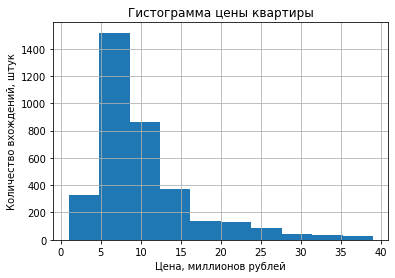

In [56]:
spb_good['last_price_millions'].hist()
plt.xlabel('Цена, миллионов рублей')
plt.ylabel('Количество вхождений, штук')
plt.title('Гистограмма цены квартиры')
plt.show()

Аналогично с ценами. В центре - более дорогие квартиры. (Шок)

Количеству комнат:

In [57]:
spb_good['rooms'].describe()

count    3550.000000
mean        2.649859
std         1.154429
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         7.000000
Name: rooms, dtype: float64

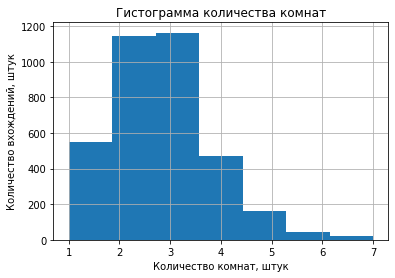

In [58]:
spb_good['rooms'].hist(bins = 7)
plt.xlabel('Количество комнат, штук')
plt.ylabel('Количество вхождений, штук')
plt.title('Гистограмма количества комнат')
plt.show()

Многокомнатных квартир также больше. (Снова шок)

Высоте потолков:

In [59]:
spb_good['ceiling_height'].describe()

count    3550.000000
mean        2.904297
std         0.298828
min         2.509766
25%         2.650391
50%         2.800781
75%         3.099609
max         3.980469
Name: ceiling_height, dtype: float64

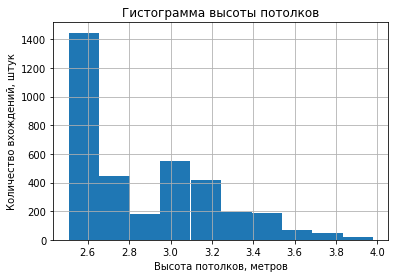

In [60]:
spb_good['ceiling_height'].hist(bins=10)
plt.xlabel('Высота потолков, метров')
plt.ylabel('Количество вхождений, штук')
plt.title('Гистограмма высоты потолков')
plt.show()

В центре, судя по всему, больше квартир с минимальным размером потолка, меньше - с 2.8м и больше - с 3.0. 

Рассмотрим факторы, влияющие на стоимость квартиры: <br>
Число комнат:

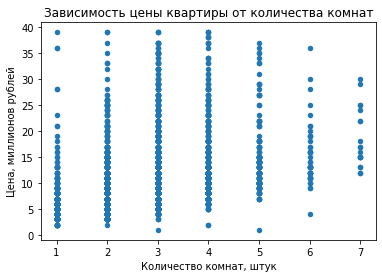

0.40390263541204113

In [61]:
spb_good.plot(x='rooms', y='last_price_millions', kind='scatter')
plt.xlabel('Количество комнат, штук')
plt.ylabel('Цена, миллионов рублей')
plt.title('Зависимость цены квартиры от количества комнат')
plt.show()
spb_good['rooms'].astype('float64').corr(spb_good['last_price_millions'])

Здесь мы видим, что коэффициент Пуассона уменьшился с 0.49 до 0.4

Этаж:

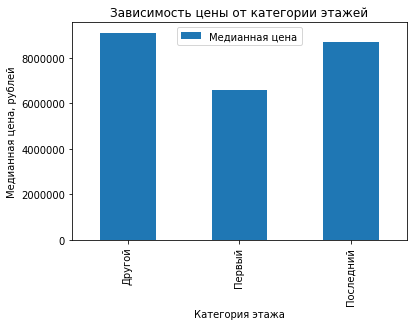

In [62]:
categories2 = spb_good.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = 'median')
categories2.plot(y='last_price', kind='bar', label="Медианная цена")
plt.xlabel('Категория этажа')
plt.ylabel('Медианная цена, рублей')
plt.title('Зависимость цены от категории этажей')
plt.show()

Тенденция сохранилась.<br>
Эх, Не видят питерцы романтики в жизни на первом этаже на лиговском.

Удаленность от центра:

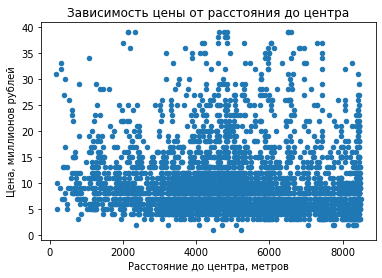

-0.07139538107427434

In [63]:
spb_good.plot(x='center_distance', y='last_price_millions', kind='scatter')
plt.xlabel('Расстояние до центра, метров')
plt.ylabel('Цена, миллионов рублей')
plt.title('Зависимость цены от расстояния до центра')
plt.show()
spb_good['center_distance_km'].corr(spb_good['last_price_millions'])

Самый сильно изменившийся граффик. С учётом ужатия радиуса исследования резонно, что коэфициент Пуассона приблизился к нулю.

Дата размещения объявления.<br>
День недели:

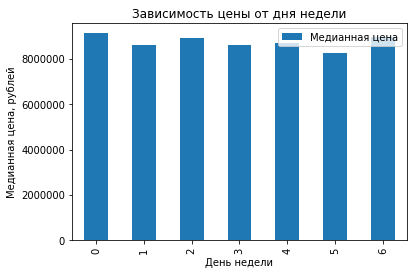

In [64]:
day2 = spb_good.pivot_table(index = 'weekday', values = 'last_price', aggfunc = 'median')
day2.plot(y='last_price', kind='bar', label='Медианная цена')
plt.xlabel('День недели')
plt.ylabel('Медианная цена, рублей')
plt.title('Зависимость цены от дня недели')
plt.show()

Месяц:

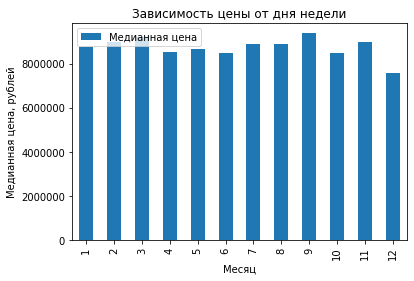

In [65]:
month2 = spb_good.pivot_table(index = 'month', values = 'last_price', aggfunc = 'median')
month2.plot(y='last_price', kind='bar', label='Медианная цена')
plt.xlabel('Месяц')
plt.ylabel('Медианная цена, рублей')
plt.title('Зависимость цены от месяца')
plt.show()

Год:

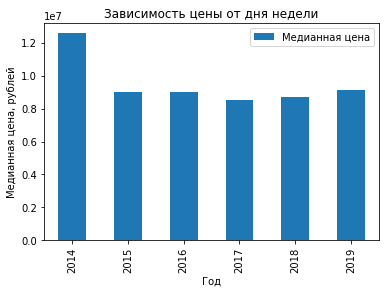

In [66]:
year2 = spb_good.pivot_table(index = 'year', values = 'last_price', aggfunc = 'median')
year2.plot(y='last_price', kind='bar', label = 'Медианная цена')
plt.xlabel('Год')
plt.ylabel('Медианная цена, рублей')
plt.title('Зависимость цены от года')
plt.show()

До сих пор не очень понимаю, чем ценен этот анализ.

## Общий вывод

Произведена предобработка данных: заполнены пробелы, где это имело смысл, изменены типы данных, отброшены аномальные значения некоторых столбцов, а в некоторых случаях и столбцы целиком, переименован столбец для соблюдения стиля. Аппартаменты и студии выставлены за дверь. Квартиры. Шутка.<br>

Добавлены новые столбцы с ценой квадратного метра, днём недели, месяца и год публикации объявления (нет, серьёзно, зачем?), соотношением жилой и общей площади, кухни к общей площади, категорирована этажность.<br>

Изучены следующие параметры: площадь, цена, число комнат, высота потолков. Построены гистограммы для каждого параметра.<br>

Изучено время продажи квартиры. Среднее время - 182 дня, медиана - 97 дней.<br>
Определено, что быстрая продажа - меньше месяца, долгая - больше года, обычная - между месяцем и полугодом.<br>

Изучено зависит ли цена от: 
1) Площади - коэфициент Пуассона составил 0.77, что говорит о высокой зависимости 
2) Числа комнат - коэфициент Пуассона - 0.49, также логичный результат, зависимость есть 
3) Удалённости от центра - чем дальше квартира, тем в среднем она меньше стоит
4) От того, на каком этаже расположена квартира: первом, последнем или другом - также выявлен закономерный результат, квартины на первом и последних этажах стоят меньше, чем на других
5) Также изучена зависимость от даты размещения: дня недели, месяца и года. <br>

Выбраны 10 населённых пунктов с наибольшим числом объявлений. На первом месте, очевидно, северная столица с 12810 объявлениями. <br> Посчитана средняя цена квадратного метра в этих населённых пунктах. Выделены населённые пункты с самой высокой и низкой стоимостью жилья - Санкт-Петербург с 105523 рублями за квадратный метр и Сланцы, соответственно, с 17635 рублей за квадратный метр.<br>

Определен радиус "центра" Питербурга - 9 киллометров. Высчитана средняя цена жилья для каждого километра, построен график.<br>

Вышеописанные изучения применены к центру Питера, произведено сравнение. Например, средняя (медианная) цена квартиры во всей области - около 4 миллионов, в случае с центром Питера - в два раза больше, около 8 миллионов. <br>

Резюмируя произведенный анализ можно сказать, что чем ближе к центру Питера и чем ближе площадь жилья, тем больше стоит квартира. Квартиры на первых этажах стоят меньше чем на последних, а последние (ловко я?) меньше, чем "другие". В регионе стоимость жилья на порядок ниже.<br>

Я уже говорил про граффики? Так вот, много графиков...

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод